In [16]:
import ROOT
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [17]:
data_h_rest = pd.read_csv('(ZProp)DATA_particle_momentum.csv')
data_Z_rest = pd.read_csv('(ZProp)(Z_Rest_Frame)Momentum_Data.csv')

In [18]:
import pandas as pd

# Input file
input_file = "particles_velocities.csv"  # Replace with your actual file name

# Output file
output_file = "z_boson_velocity.csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
z_boson_data = data[data["Particle"] == "Z Boson"]

# Select required columns: Event, Px, Py, Pz
z_boson_velocity = z_boson_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
z_boson_velocity.to_csv(output_file, index=False)

print(f"Z boson momentum data saved to {output_file}.")


Z boson momentum data saved to z_boson_velocity.csv.


In [19]:
import pandas as pd

# Input file
input_file = "Transformed_velocities.csv"  # Replace with your actual file name

# Output file
output_file = "em(Zrest)_velocity.csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
em_data = data[data["Particle"] == "Electron-"]

# Select required columns: Event, Px, Py, Pz
em_velocity = em_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
em_velocity.to_csv(output_file, index=False)

print(f"Electron momentum data saved to {output_file}.")

Electron momentum data saved to em(Zrest)_velocity.csv.


In [20]:
import numpy as np
import pandas as pd

# Read the electron and Z boson velocity data
electron_data = pd.read_csv("em(Zrest)_velocity.csv")
z_boson_data = pd.read_csv("z_boson_velocity.csv")

# Initialize an empty list to store the angles
angles = []

# Loop through each event to compute the angle
for i, event in electron_data.iterrows():
    # Get the velocities of the electron and Z boson for the current event
    v_electron = np.array([event['Vx'], event['Vy'], event['Vz']])
    z_event = z_boson_data.iloc[i]
    v_z_boson = np.array([z_event['Vx'], z_event['Vy'], z_event['Vz']])
    
    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(v_electron, v_z_boson)
    mag_electron = np.linalg.norm(v_electron)
    mag_z_boson = np.linalg.norm(v_z_boson)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (mag_electron * mag_z_boson)
    
    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    
    # Append the angle to the list
    angles.append([electron_data.iloc[i]['Event'], angle_deg])

# Create a DataFrame for the angles
angle_df = pd.DataFrame(angles, columns=['Event', 'Angle (degrees)'])

# Save the angles to a CSV file
angle_df.to_csv('angles.csv', index=False)


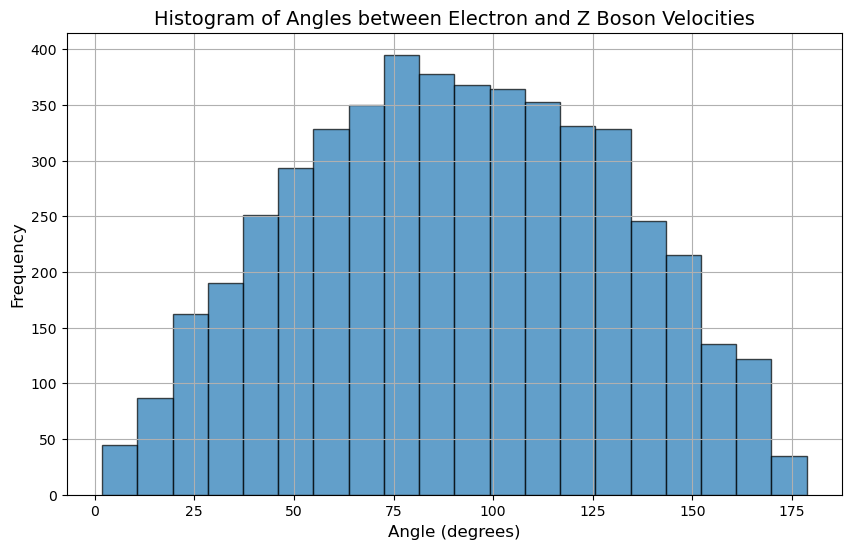

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the angles CSV file (assuming it was generated by the previous code)
angles_df = pd.read_csv("angles.csv")

# Extract the angles for plotting
angles = angles_df['Angle (degrees)']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angles between Electron and Z Boson Velocities', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()
